In [1]:
ls

01-sentence2vec.ipynb          __pycache__/       output/
02-reduction-dimensions.ipynb  grid_plot_umap.py


In [35]:
import umap
import pandas as pd 
import numpy as np
from grid_plot_umap import UmapOptimization
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import os
from tqdm.auto import tqdm

In [3]:
def generate_scatter_graph(plot_lst, dict_sort):
    entp_list = []
    n = 4
    datas = [dict_sort[i*n:(i+1)*n] for i in range(len(dict_sort)//n)]
    for batch in datas:
        fig, axes = plt.subplots(1, n, figsize=(40,10))
        for i, elm in enumerate(batch):
            idx = elm.get('index')            
            data_tmp = plot_lst[idx]

            # entropy 
            axes[i].contourf(data_tmp.get('xx'), data_tmp.get('yy'), data_tmp.get('grid_density'), cmap=plt.cm.Blues, alpha=0.7)
            # axes[i].scatter(data_tmp.get('x'), data_tmp.get('y'), alpha=0.9, s=0.1) 
            axes[i].scatter(data_tmp.get('x'), data_tmp.get('y'), alpha=0.9, s=20) 
            axes[i].set_title(f"UMAP {data_tmp.get('model_index')} Entropy = {round(data_tmp.get('entropy'), 4)} n_neighbors = {data_tmp.get('n_neighbors')} min_dist = {data_tmp.get('min_dist')} spread = {data_tmp.get('spread')}")
            
        plt.show()

In [4]:
df = pd.read_parquet('./output/imdb_test.parquet')
df

text  label  \
44057  I thought that this show was a blatant rip-off...     -1   
16861  Is Def-Con 4 the worst movie ever made? It's v...     -1   
4248   This is a complete rehash of the first film. I...     -1   
10982  This is one of the best things on tv today, if...     -1   
31692  The best movie of Czech genius Jiri Menzel (af...     -1   
...                                                  ...    ...   
44812  ... But not in a good way .<br /><br />I saw H...     -1   
26098  I personally, thought the "The Howling IV" was...     -1   
46003  Any old time college movie has one plot: the b...     -1   
35711  Bigfoot movies can be fun. This one is terribl...     -1   
22782  The biggest problem for this film was that it ...     -1   

                                                  vector  
44057  [-0.036628164, -0.09474771, 0.043206602, -0.01...  
16861  [-0.020052401, -0.081306525, -0.015959825, -0....  
4248   [0.020931583, -0.062211685, 0.014268616, -0.00...  
10982  [-0.05918846, 0.041175894, 0.028914733, -0.086...  
31692  [-0.087861955, 0.040946733, -0.09735404, -0.01...  
...                                                  ...  
44812  [-0.016357826, -0.00880787, 0.023964314, -0.01...  
26098  [-0.06197646, 0.050676696, 0.046477932, -0.013...  
46003  [-0.046979096, 0.0833949, 0.01569629, 0.005126...  
35711  [-0.011460395, -0.0020965496, 0.0031189807, 0....  
22782  [0.013035727, -0.091521, 0.006770951, -0.00805...  

[5000 rows x 3 columns]

In [5]:
vector = df['vector'].tolist()

In [7]:
# params = {'n_neighbors': [10,40,80,100],
#          'min_dist':    [0.01,0.1,0.2,0.4],
#          'spread':      [0.4,0.75,0.8,1,4]}

params = {'n_neighbors': [10,40,80],
          'min_dist':    [0.01,0.1,0.2],
          'spread':      [0.4,0.75,0.8]}
          
optmizer = UmapOptimization()
optmizer.input(params, np.array(vector))
result = optmizer.output()

  0%|          | 0/27 [00:00<?, ?it/s]

/usr/local/lib/python3.12/site-packages/umap/umap_.py:1394: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/usr/local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.12/site-packages/umap/umap_

In [14]:
os.makedirs('./output/umap', exist_ok=True)
with open('./output/umap/grid_models_umap.pkl', 'wb') as f : 
    pickle.dump(result, f)

In [16]:
rs_lst = []
for idx, model in enumerate(result) : 
    i = {}
    params = model.get_params()
    i['x'] = model.embedding_[:,0]
    i['y'] = model.embedding_[:,1]
    i['n_neighbors'] = params.get('n_neighbors')
    i['min_dist'] = params.get('min_dist')
    i['spread'] = params.get('spread')
    i['random_state'] = params.get('random_state')
    i['model_idx'] = idx
    i['model'] = model
    rs_lst.append(i)

with open('./output/umap/annotation_umaps.pkl', 'wb') as f : 
    pickle.dump(rs_lst, f)

In [18]:
df_plot = pd.DataFrame(rs_lst)
df_plot

x  \
0   [10.468412, 9.169136, 10.017322, 10.46891, 8.2...   
1   [10.586247, 8.8482275, 9.614476, 10.367327, 7....   
2   [12.127986, 9.573285, 10.686427, 12.020563, 7....   
3   [10.4814625, 9.259288, 9.554761, 10.514573, 8....   
4   [12.760024, 14.602995, 14.941617, 12.943111, 1...   
5   [14.389671, 14.845128, 15.821709, 14.120381, 1...   
6   [11.487063, 10.165878, 10.735569, 11.321577, 9...   
7   [11.007114, 9.402152, 10.55877, 10.73394, 8.79...   
8   [14.474932, 14.934606, 15.556415, 14.135687, 1...   
9   [12.679752, 12.189772, 12.394253, 12.604244, 1...   
10  [18.817135, 20.524446, 20.791506, 18.832205, 1...   
11  [19.36102, 20.981623, 21.264082, 19.514313, 18...   
12  [11.445215, 10.503117, 10.838415, 11.275649, 9...   
13  [14.257755, 12.564985, 13.0151615, 13.970812, ...   
14  [16.371922, 14.42842, 15.017028, 16.031017, 12...   
15  [5.185947, 5.6677556, 5.371321, 5.3410034, 7.3...   
16  [20.775398, 22.557106, 22.499496, 21.124584, 1...   
17  [12.528482, 10.799868, 11.439092, 12.00166, 9....   
18  [12.065889, 12.717455, 12.534788, 12.231826, 1...   
19  [11.103189, 9.958913, 10.4879465, 10.957238, 8...   
20  [10.8660965, 9.630777, 10.250085, 10.750944, 8...   
21  [6.874095, 6.065692, 6.2470016, 6.6613812, 6.4...   
22  [16.838842, 15.76352, 16.112375, 16.726715, 13...   
23  [16.03281, 14.342517, 14.8092785, 15.8055, 12....   
24  [10.762724, 11.354657, 11.149982, 10.959309, 1...   
25  [17.52028, 15.970234, 16.332405, 17.305283, 13...   
26  [13.029422, 12.112774, 12.78496, 12.780368, 10...   

                                                    y  n_neighbors  min_dist  \
0   [1.1664919, 0.60639495, 0.74078625, 1.1663073,...           10      0.01   
1   [2.4816113, -0.35143796, -2.688068, 2.4524066,...           10      0.01   
2   [6.5474854, 6.4795413, 6.429107, 6.5214934, 3....           10      0.01   
3   [5.5109076, 5.2645445, 5.442132, 5.4477434, 3....           10      0.10   
4   [6.595367, 8.226248, 7.90302, 6.8437986, 10.35...           10      0.10   
5   [5.1043673, 3.2460003, 3.4005516, 4.9239573, 1...           10      0.10   
6   [6.839995, 7.890625, 7.3329864, 6.8016257, 8.7...           10      0.20   
7   [6.32818, 8.191316, 7.238708, 6.57553, 10.8024...           10      0.20   
8   [5.705974, 3.8725338, 4.6589694, 5.24235, 1.41...           10      0.20   
9   [0.8213081, -0.13048716, 0.13579819, 0.7780242...           40      0.01   
10  [4.4134464, 3.7732763, 3.7291827, 4.382074, 2....           40      0.01   
11  [4.902699, 4.064482, 3.8064227, 4.8041363, 2.0...           40      0.01   
12  [4.0246964, 4.625118, 4.5042515, 4.10328, 3.87...           40      0.10   
13  [6.453815, 7.676643, 7.3959665, 6.6387377, 6.3...           40      0.10   
14  [-7.623159, -8.640048, -8.3205385, -7.748322, ...           40      0.10   
15  [2.8639297, 3.9782717, 3.6307018, 2.9893064, 3...           40      0.20   
16  [1.2860118, 0.12435733, 0.15373848, 0.85883504...           40      0.20   
17  [-3.60179, -5.808768, -5.0491943, -4.0393267, ...           40      0.20   
18  [-1.4159153, -0.6648912, -0.82365423, -1.30988...           80      0.01   
19  [-1.6618999, -3.210027, -2.7359958, -1.7546211...           80      0.01   
20  [-6.3874683, -8.535571, -7.9943013, -6.4032297...           80      0.01   
21  [-3.3926828, -2.7491791, -2.9755309, -3.287872...           80      0.10   
22  [-5.2893157, -6.866631, -6.5155034, -5.4900193...           80      0.10   
23  [-7.9728866, -9.215052, -8.867542, -8.272873, ...           80      0.10   
24  [2.129034, 1.1687521, 1.5151663, 1.9604828, -0...           80      0.20   
25  [-7.308355, -8.544281, -7.8985243, -7.5946155,...           80      0.20   
26  [-4.938893, -7.3577986, -6.85289, -5.256841, -...           80      0.20   

    spread  random_state  model_idx  \
0     0.40        621197          0   
1     0.75        594534          1   
2     0.80        705474          2   
3     0.40        567665          3   
4     0.75        9

In [19]:
df_plot = df_plot[['n_neighbors','spread', 'min_dist']].sort_values(by=['n_neighbors', 'spread', 'min_dist'])
# df_plot = df_plot[['spread', 'entropy','n_neighbors', 'min_dist']].sort_values(by=['spread', 'entropy', 'n_neighbors', 'min_dist'])
# df_plot = df_plot[['entropy','min_dist', 'spread', 'n_neighbors']].sort_values(by=['entropy','min_dist','spread', 'n_neighbors'])
df_plot

n_neighbors  spread  min_dist
0            10    0.40      0.01
3            10    0.40      0.10
6            10    0.40      0.20
1            10    0.75      0.01
4            10    0.75      0.10
7            10    0.75      0.20
2            10    0.80      0.01
5            10    0.80      0.10
8            10    0.80      0.20
9            40    0.40      0.01
12           40    0.40      0.10
15           40    0.40      0.20
10           40    0.75      0.01
13           40    0.75      0.10
16           40    0.75      0.20
11           40    0.80      0.01
14           40    0.80      0.10
17           40    0.80      0.20
18           80    0.40      0.01
21           80    0.40      0.10
24           80    0.40      0.20
19           80    0.75      0.01
22           80    0.75      0.10
25           80    0.75      0.20
20           80    0.80      0.01
23           80    0.80      0.10
26           80    0.80      0.20

In [20]:
data_dict = df_plot.reset_index().to_dict('records')
data_dict

[{'index': 0, 'n_neighbors': 10, 'spread': 0.4, 'min_dist': 0.01},
 {'index': 3, 'n_neighbors': 10, 'spread': 0.4, 'min_dist': 0.1},
 {'index': 6, 'n_neighbors': 10, 'spread': 0.4, 'min_dist': 0.2},
 {'index': 1, 'n_neighbors': 10, 'spread': 0.75, 'min_dist': 0.01},
 {'index': 4, 'n_neighbors': 10, 'spread': 0.75, 'min_dist': 0.1},
 {'index': 7, 'n_neighbors': 10, 'spread': 0.75, 'min_dist': 0.2},
 {'index': 2, 'n_neighbors': 10, 'spread': 0.8, 'min_dist': 0.01},
 {'index': 5, 'n_neighbors': 10, 'spread': 0.8, 'min_dist': 0.1},
 {'index': 8, 'n_neighbors': 10, 'spread': 0.8, 'min_dist': 0.2},
 {'index': 9, 'n_neighbors': 40, 'spread': 0.4, 'min_dist': 0.01},
 {'index': 12, 'n_neighbors': 40, 'spread': 0.4, 'min_dist': 0.1},
 {'index': 15, 'n_neighbors': 40, 'spread': 0.4, 'min_dist': 0.2},
 {'index': 10, 'n_neighbors': 40, 'spread': 0.75, 'min_dist': 0.01},
 {'index': 13, 'n_neighbors': 40, 'spread': 0.75, 'min_dist': 0.1},
 {'index': 16, 'n_neighbors': 40, 'spread': 0.75, 'min_dist': 

  0%|          | 0/4 [00:00<?, ?it/s]

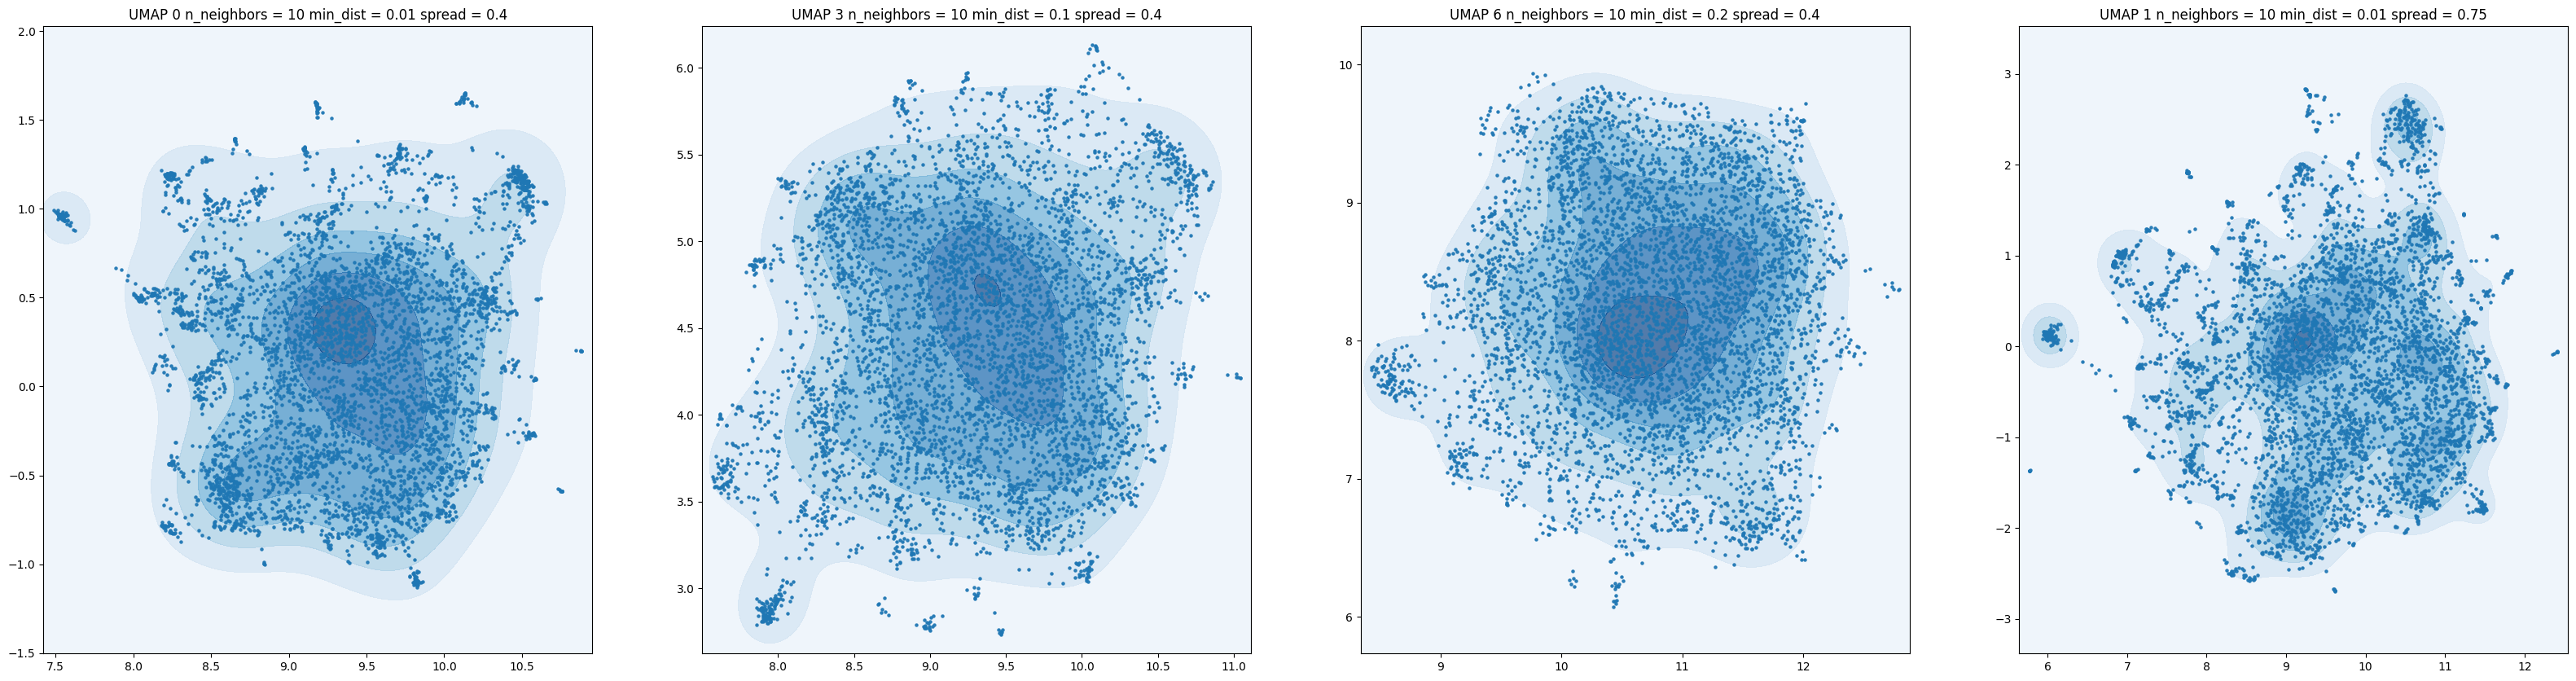

  0%|          | 0/4 [00:00<?, ?it/s]

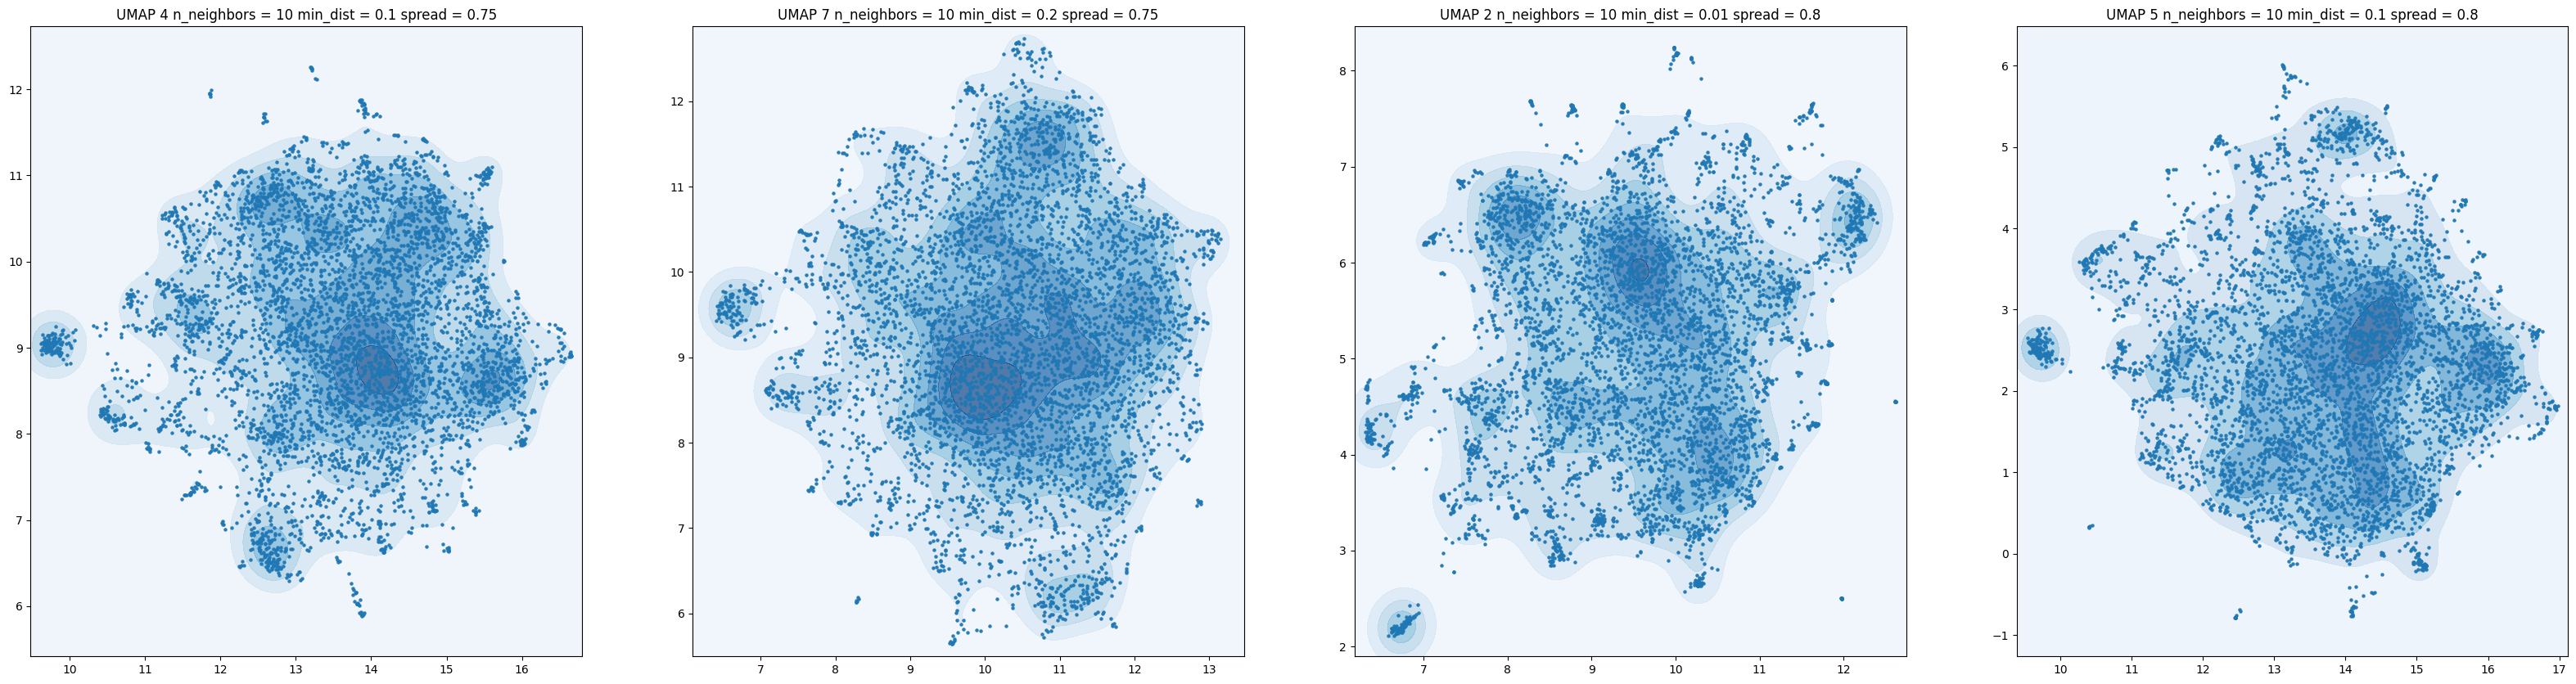

  0%|          | 0/4 [00:00<?, ?it/s]

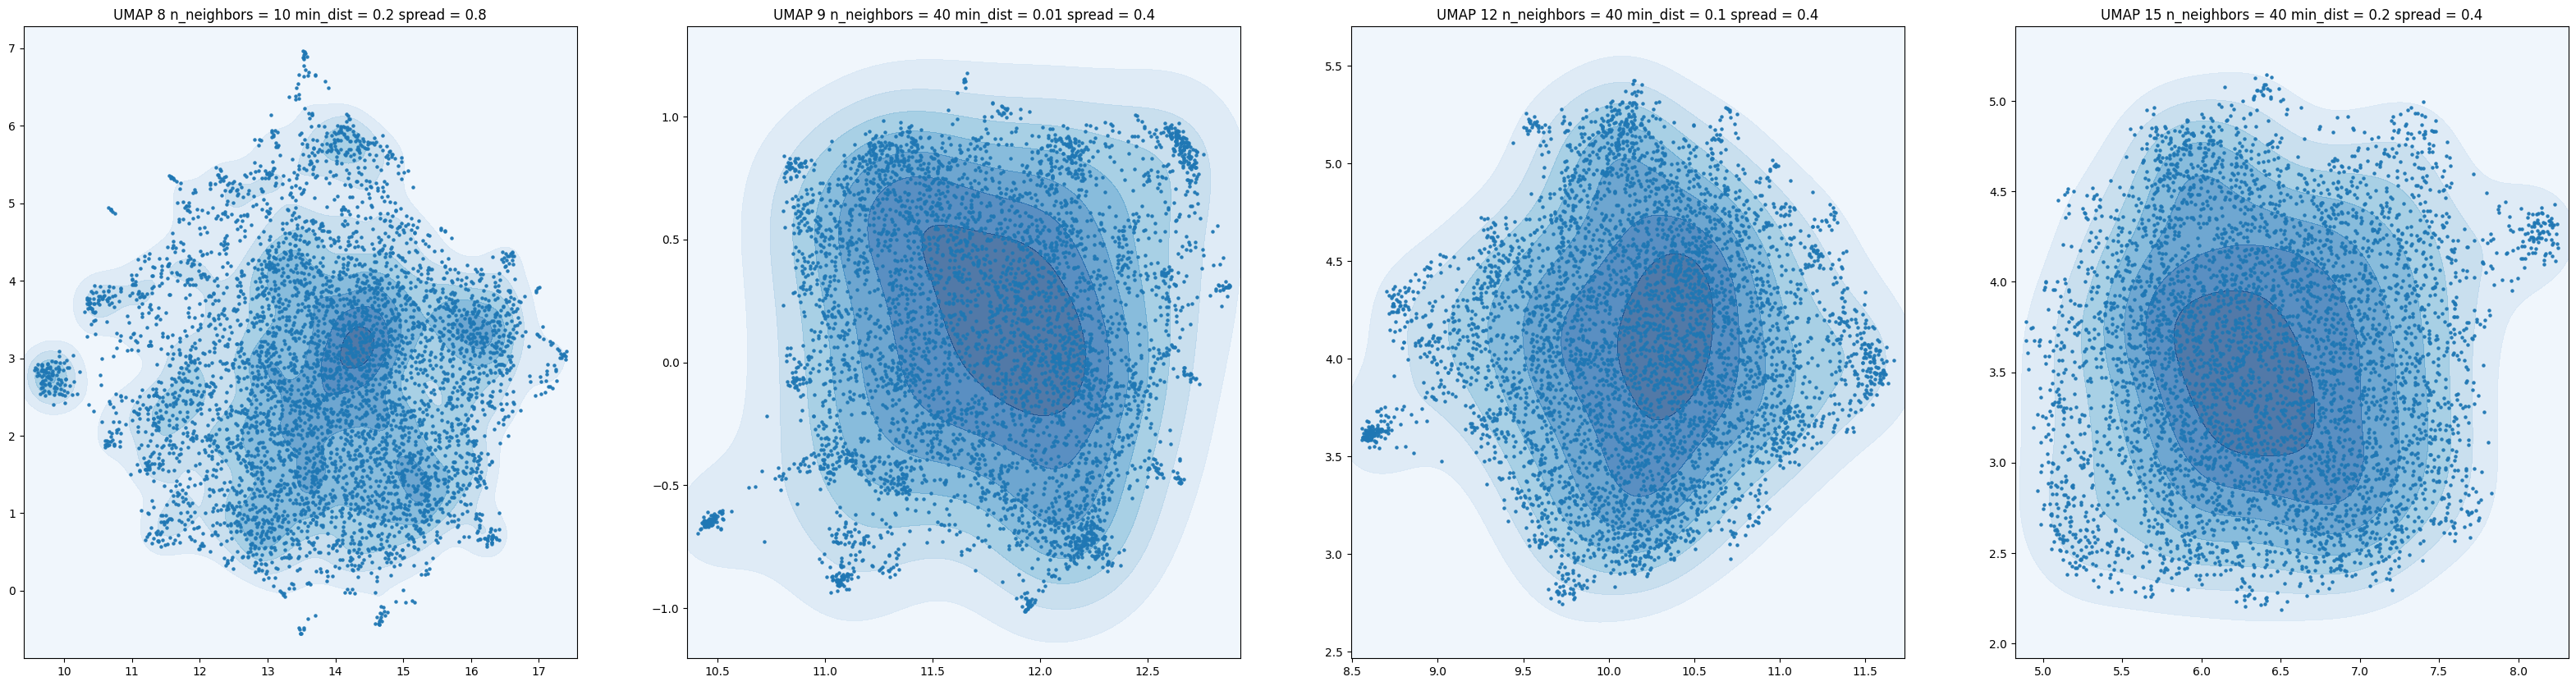

  0%|          | 0/4 [00:00<?, ?it/s]

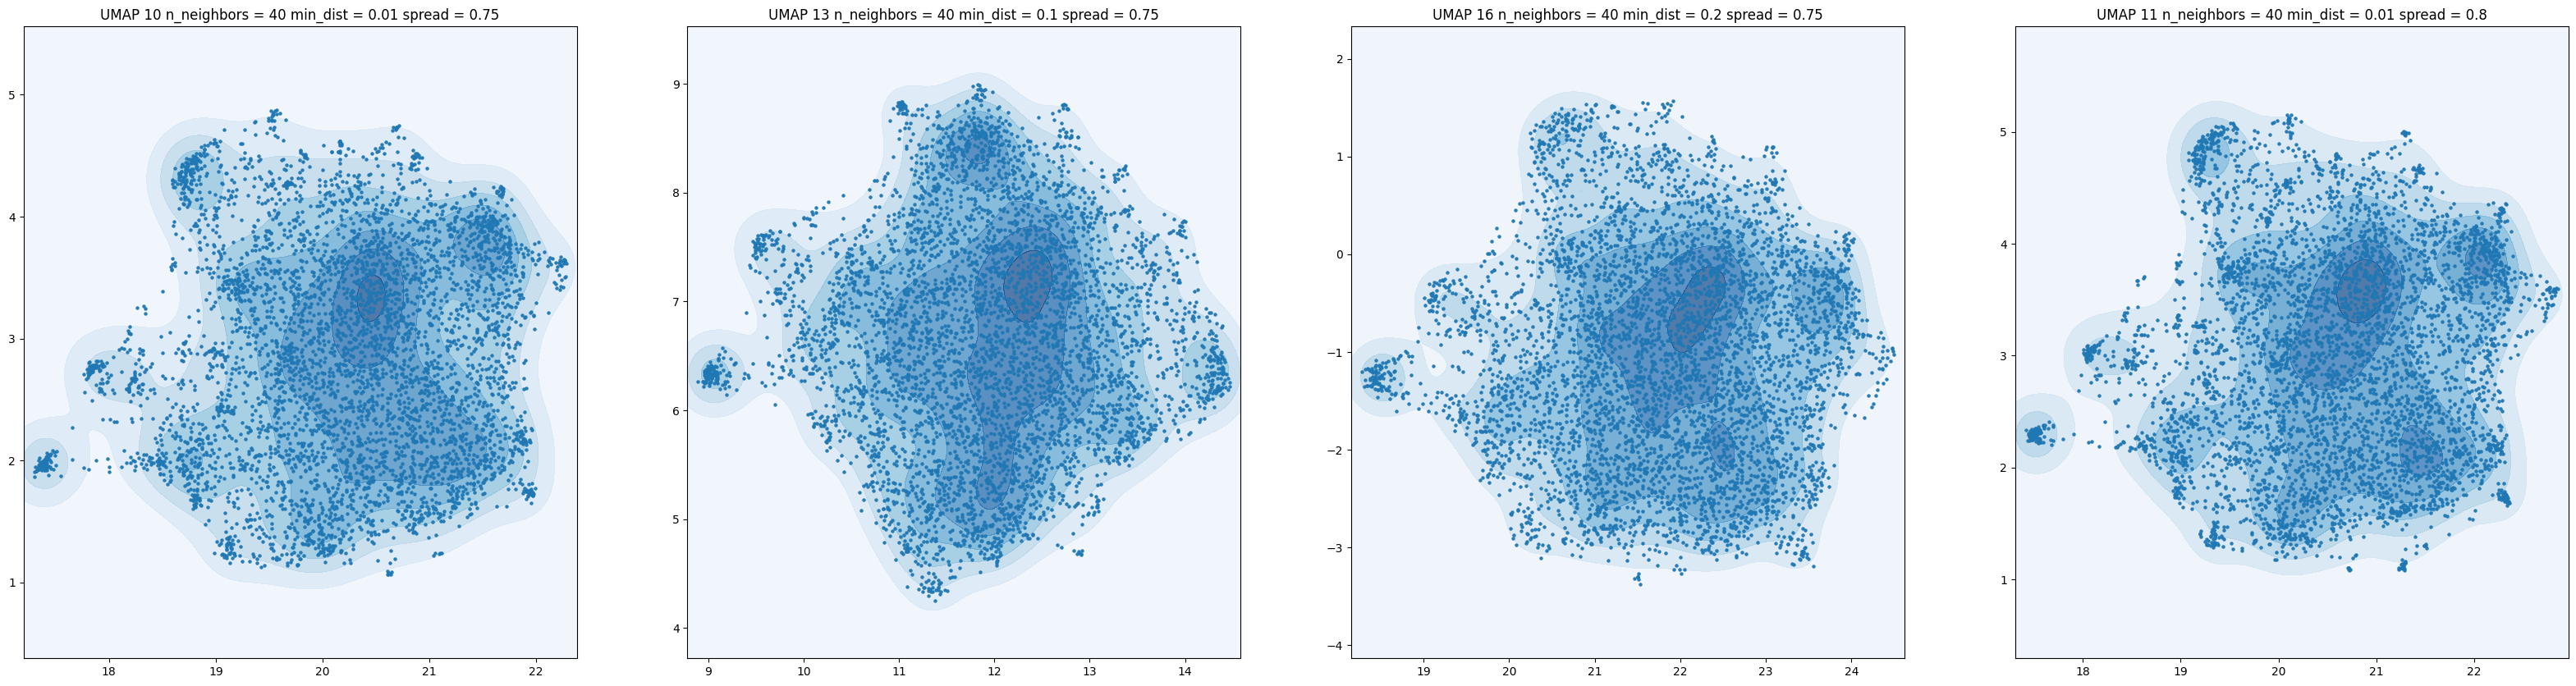

  0%|          | 0/4 [00:00<?, ?it/s]

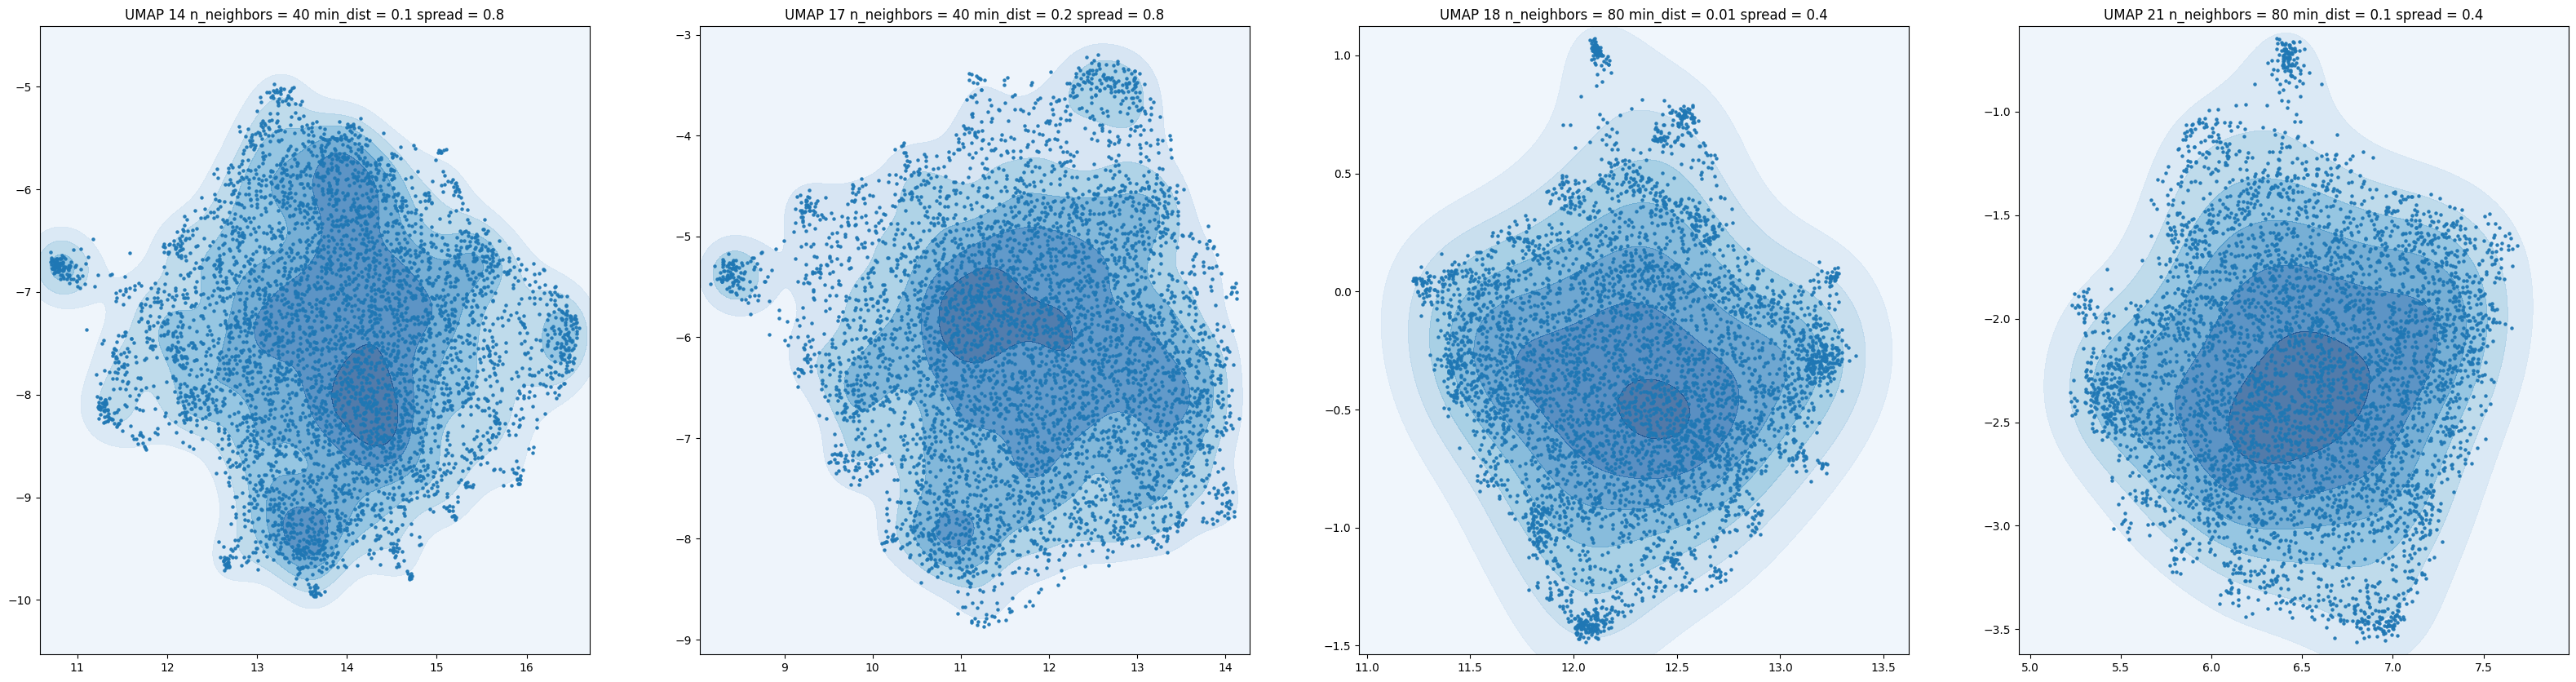

  0%|          | 0/4 [00:00<?, ?it/s]

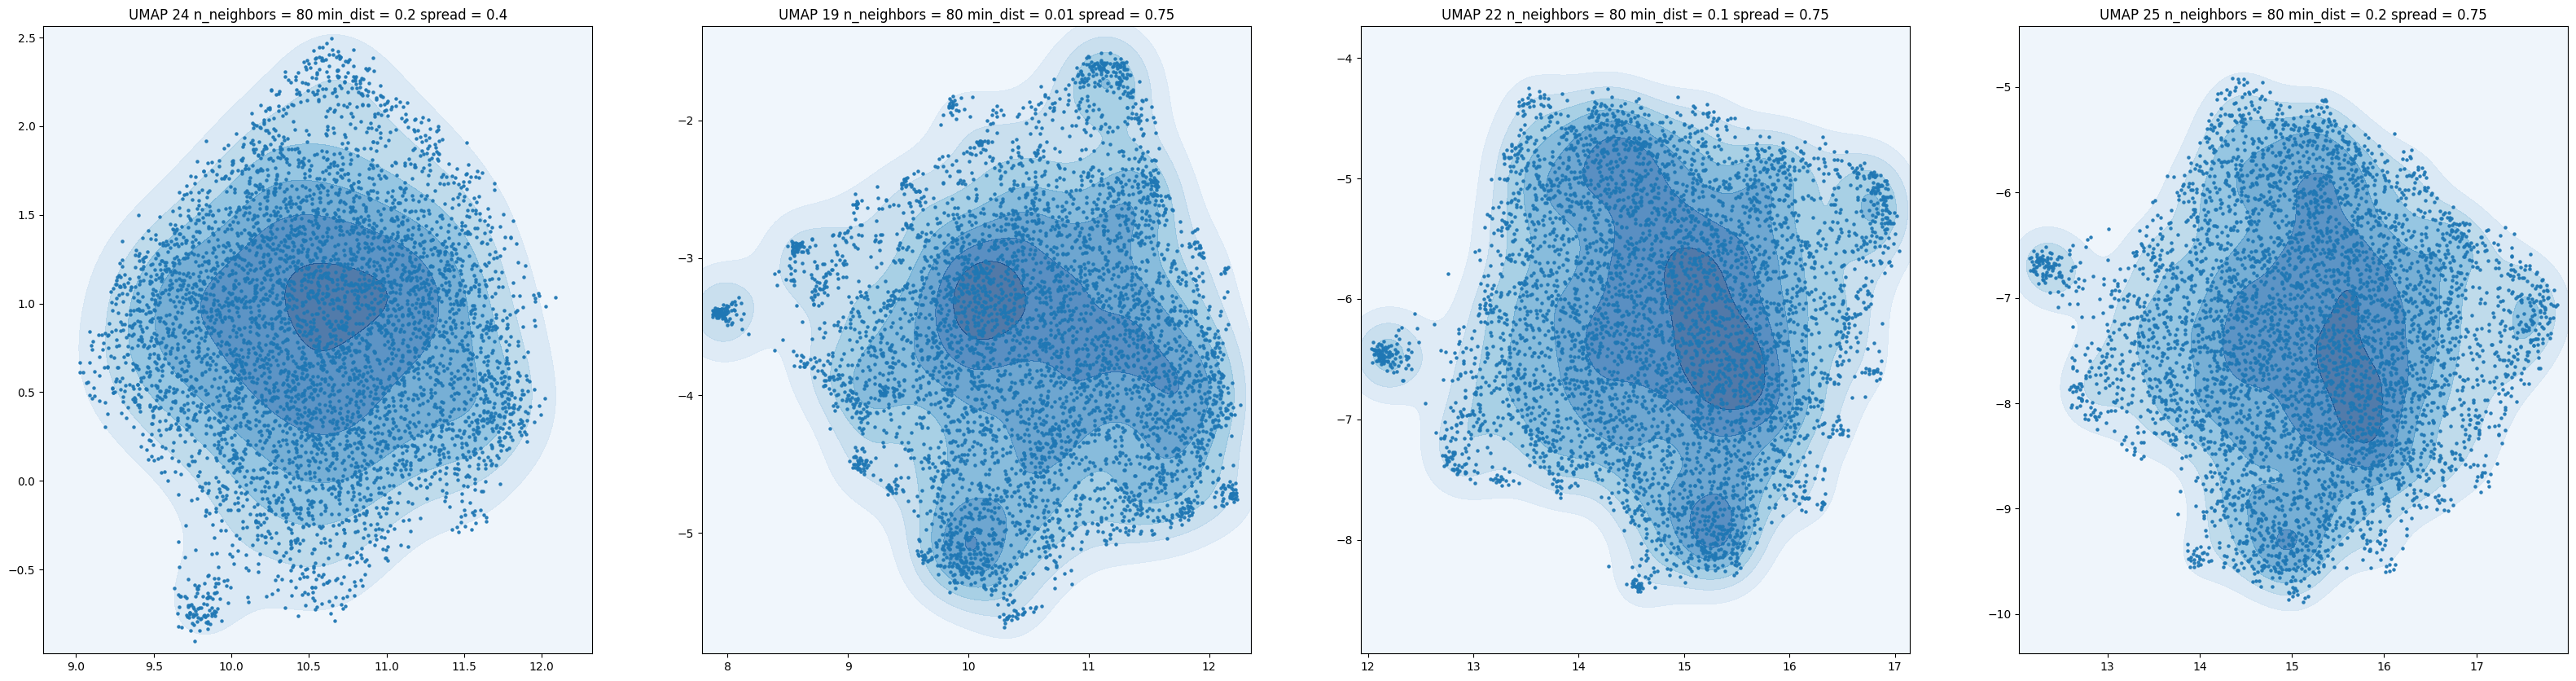

In [37]:
def get_Density(xs, ys, max_sample=100000, SEED=1234, grid_size=200):

    projected_emb = np.stack((xs, ys), axis=1)

    x_min, x_max = np.min(xs), np.max(xs)
    y_min, y_max = np.min(ys), np.max(ys)
    
    x_gap = x_max - x_min
    y_gap = y_max - y_min
    
    if x_gap > y_gap:
    
        # Expand the larger range to leave some padding in the plots
        x_min -= x_gap / 50
        x_max += x_gap / 50
        x_gap = x_max - x_min
        
        # Regulate the 2D grid to be a square
        y_min -= (x_gap - y_gap) / 2
        y_max += (x_gap - y_gap) / 2
        
    else:
        # Expand the larger range to leave some padding in the plots
        y_min -= y_gap / 50
        y_max += y_gap / 50
        y_gap = y_max - y_min
        
        # Regulate the 2D grid to be a square
        x_min -= (y_gap - x_gap) / 2
        x_max += (y_gap - x_gap) / 2
    
    # Estimate on a 2D grid
    grid_xs = np.linspace(x_min, x_max, grid_size)
    grid_ys = np.linspace(y_min, y_max, grid_size)
    xx, yy = np.meshgrid(grid_xs, grid_ys)
    
    grid = np.vstack([xx.ravel(), yy.ravel()]).transpose()

    sample_size = min(max_sample, len(xs))
    n = sample_size
    d = projected_emb.shape[1]
    bw = (n * (d + 2) / 4.)**(-1. / (d + 4))
    
    # We use a random sample to fit the KDE for faster run time
    rng = np.random.RandomState(SEED)
    random_indexes = rng.choice(range(projected_emb.shape[0]),
                                min(projected_emb.shape[0], sample_size),
                                replace=False)
    
    kde = KernelDensity(kernel='gaussian', bandwidth=bw)
    kde.fit(projected_emb[random_indexes, :])

    log_density = kde.score_samples(grid)
    log_density = np.exp(log_density)
    grid_density = np.reshape(log_density, xx.shape)
    
    return grid_density, xx, yy, bw
                                
def generate_scatter_graph(plot_lst, dict_sort, plot_grid=Falas):
    entp_list = []
    n = 4
    datas = [dict_sort[i*n:(i+1)*n] for i in range(len(dict_sort)//n)]
    for batch in datas:
        fig, axes = plt.subplots(1, n, figsize=(40,10))
        for i, elm in enumerate(tqdm(batch)):
            idx = elm.get('index')            
            data_tmp = plot_lst[idx]
            x = data_tmp.get('x')
            y = data_tmp.get('y')
            if plot_grid : 
                grid_density, xx, yy, bw = get_Density(x,y)
                axes[i].contourf(xx, yy, grid_density, cmap=plt.cm.Blues, alpha=0.7)
            axes[i].scatter(x, y , alpha=0.9, s=5) 
            axes[i].set_title(f"UMAP {data_tmp.get('model_idx')} n_neighbors = {data_tmp.get('n_neighbors')} min_dist = {data_tmp.get('min_dist')} spread = {data_tmp.get('spread')}")
            
        plt.show()

generate_scatter_graph(rs_lst, data_dict)